 ## TP 5 : Markov chains & multithreading + _seaborn_

## Tanguy JEANNEAU & Adrien HANS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

### A. Useful tool for visualization: _seaborn_
_seaborn_ is a package designed for nice data and data analysis visualization.
See <http://seaborn.pydata.org/examples/> for examples of nice predefined graphics. Here is a way to represent the empirical distributions of 9 realizations of a bivariate random variable with normal distribution: 

<IPython.core.display.Javascript object>


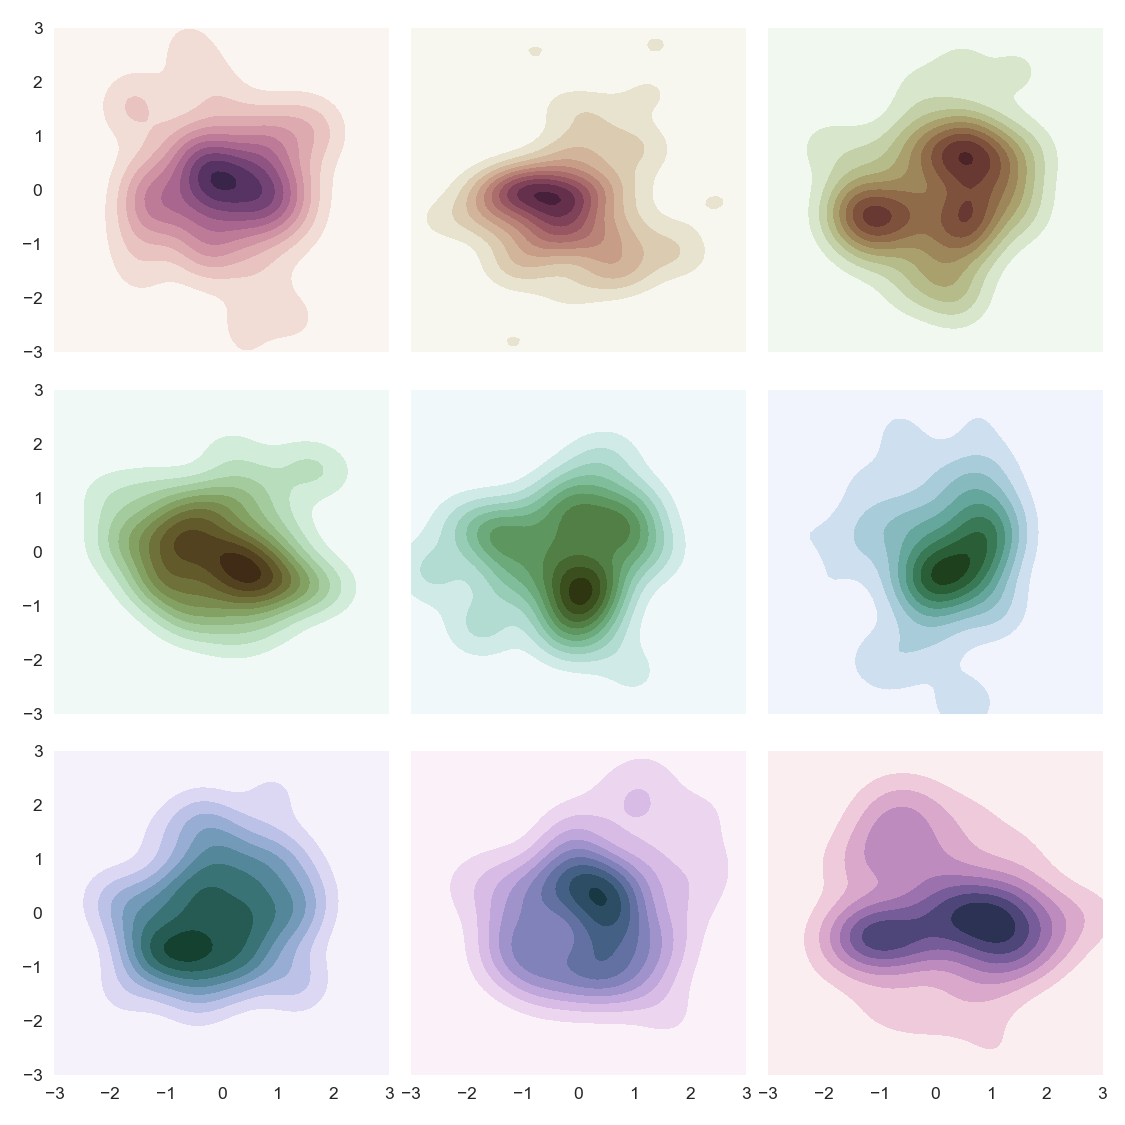

In [2]:
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

**What is this example illustrating ?** (try to make each line of the code explicit, including the KDE method...)

*Setting up seaborn :*<br>
`sns.set(style="dark")`
*computing rs, a random*<br>
`rs = np.random.RandomState(50)`

*Setting up the matplotlib figure* :<br>
`f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)`

*Rotate the starting point around the cubehelix hue circle*: <br>
`for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):`

*Create a cubehelix colormap to use with kdeplot*<br>
    `cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)`

*Generate and plot a random bivariate dataset*<br>
    `x, y = rs.randn(2, 50)`

**kde method : **
`sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)` <br>
kdeplot() : Fit and plot a univariate or bivariate kernel density estimate. <br>
https://seaborn.pydata.org/generated/seaborn.kdeplot.html
The Kernel Density Estimation permits to plot the shape of a distribution. The KDE plots encodes the density of observations with the color of it (the darker the more dense) with heights along the axis.
<br>
*parameters :*
- data : here x, a 1d array-like
- data2 : here y, a 1d array-like which is optional
- cmap : the colormap 
- shade : "If True, shade in the area under the KDE curve (or draw with filled contours when data is bivariate)."

`ax.set(xlim=(-3, 3), ylim=(-3, 3))` : sets the limits of the x and y axis

## B. Simulation of Markov chains
Let ${(X_n)}_{n\geq 0}$ a Markov chain with values in a finite ensemble 
$E=\{x_1,\dots,x_N\}$ identified to $E=\{1,\dots,N\}$. The initial state is distributed according to:
$$
P(X_0 = k) = \rho_k,\qquad k=1\dots N.
$$
Let $A$ the transition matrix of this chain. We know that if $X_n = k$, the life time of the chain in this state obeys a geometrical law  with parameter $a_{kk}$. We also know that the probability of transition from  k to $\ell\neq k$
is given by:
$$
P(X_{n+1}=\ell | X_n=k, X_{n+1}\neq k) = \frac{a_{k\ell}}{1-a_{kk}}.
$$

### One possible algorithm to simulate a Markov chain is therefore:

   a. generate the initial state $X_0$ according to the discrete law $\{\rho_1,\dots,\rho_N\}$.
   
   b. at instant $n$, knowing that $X_n=k$,
   
   i) determine the life time $T$ in state $X_n=k$ by simulating a geometrical variable with parameter $a_{kk}$. As a consequence $X_n = \dots = X_{n+T} = k$. When $T=0$, we simply still have $X_n=k$.
   
   ii) determine next transition instant $n+T$, and determine the next state by using the probabilities of transition.

1. Implement this algorithm in a function yielding `X = Markov(N,rho,A,nmax)` where:
    - N: number of states,
    - rho: law of the initial state (vector of size $N$ summing to 1),
    - A: transition matrix (of size $N\times N$),
    - nmax: number of time steps.

2. Make some simulations using simple Markov matrices (any positive matrix $A=(a_{k\ell})$ such that lines sum to 1) and represent their evolution.

3. Explore the potential of the `multiprocessing` package to implement a multithreaded version so that several Markov chains can be simulated in parallel.

See <https://docs.python.org/2/library/multiprocessing.html>

**We compute the algorithm to simulate a Markov chain as described above**
<br>Using the function `Markov`

In [3]:
"""
Inputs  : 
- N : int, number of states
- rho : vector of size N summing to 1, law of the initial state. 
- A : transition matrix
- nmax : number of time steps

Outputs : 
-states : list of the states 
"""

def Markov(N,rho,A,nmax):
    #Generating the initial state :
    a=np.arange(1,N+1)
    # To generate the initial state, we use numpy.random.choice()
    X = np.random.choice(a,p=rho)
    #Initializing the list states with the initial state : 
    states=[]
    time=0
    AKK=A[X-1][X-1]
    T=np.random.geometric(AKK) #Time in the current state       
    while (time<nmax): #Number of time steps 
        #At instant n, knowing Xn=k : 
        if T==0 : #We stay in the current state as long as T different from 0, decrementing T each time 
            #Determining the next transition instant : 
            AKK=A[X-1][X-1]#akk
            T=np.random.geometric(1-AKK) #T follows a geometrical variable with parameter akk
            #Determining the next state : 
            #Computing the discrete law of the next state, with the transition matrix : 
            Transition = A[X-1] #ak.        
            #Probability of transition : 
            p=[Transition[i]/(1-AKK) for i in range(N)]
            p[X-1]=0 #It is impossible to be in the same state as before
            #Generating the next state :  
            X=np.random.choice(a, p=p)
        #Saving the state in the table states :
        states.append(X)
        time+=1
        T=T-1
    return states 

### 2. Make some simulations using simple Markov matrices (any positive matrix $A=(a_{k\ell})$ such that lines sum to 1) and represent their evolution.

#### We compute some Markov matrices : 

Firstly, we can compute one markov matrix "by hand" : 
\begin{align*}
A=
\begin{pmatrix}
0.2&0.4&0.1&0.3\\0.1&0.1&0.5&0.3\\0.2&0.2&0.4&0.2\\0.6&0.1&0.1&0.2
\end{pmatrix} 
\\
\\
\rho=
\begin{pmatrix}
0.2&0.3&0.2&0.3
\end{pmatrix} 
\end{align*}


In [4]:
A =[[0.2,0.4,0.1,0.3],[0.1,0.1,0.5,0.3],[0.2,0.2,0.4,0.2],[0.6,0.1,0.1,0.2]]
rho =[0.2,0.3,0.2,0.3]

Plot of the heatmap of the matrix : 

<IPython.core.display.Javascript object>


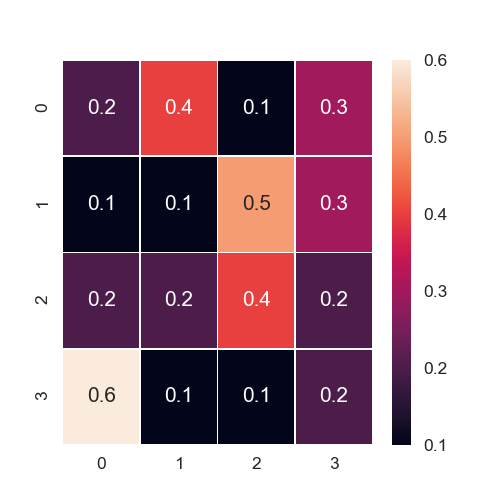

In [10]:
sns.set()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(A, annot=True, linewidths=.5)

Using 100 times steps : 

In [11]:
result=Markov(4,rho,A,100)
print(result)

[4, 4, 4, 4, 1, 2, 3, 1, 4, 1, 4, 1, 3, 4, 3, 3, 1, 2, 4, 4, 2, 2, 1, 3, 4, 1, 4, 4, 1, 2, 2, 3, 2, 2, 2, 4, 4, 3, 2, 4, 1, 4, 1, 2, 4, 1, 2, 3, 3, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 1, 2, 3, 1, 1, 1, 2, 3, 4, 1, 3, 3, 4, 4, 1, 2, 3, 1, 4, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 1, 2, 2, 4, 2, 3, 4, 1, 2]


**Representing the evolution of the chain : ** 

<IPython.core.display.Javascript object>


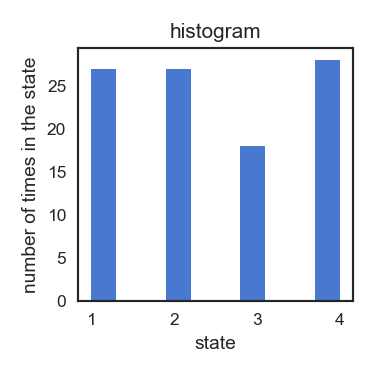

In [12]:
#Setting up seaborn : 
sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(1,1, figsize=(3,3))
#ploting the histogram  :
plt.hist(result)
plt.xlabel("state")
plt.ylabel("number of times in the state")
plt.title("histogram")

plt.tight_layout()

We can see in this histogram the states which were the most frequently visited

#### Generating a random Markov matrix :  
Using a code found here :  https://stackoverflow.com/questions/47330244/generating-random-transition-probability-matrix-python?rq=1 we can generate a random Markov Matrix without taking values "by hand"
<br>
We compute a Markov matrix of size 4. 

In [13]:
k=4
Matrix = np.identity(k) + np.random.uniform(low=0., high=.25, size=(k, k)) #Taking the identity matrix and adding random values
Matrix /= Matrix.sum(axis=1, keepdims=1) #Normalizing to have the sum of each row equal to 1 
print(Matrix)

[[ 0.78407101  0.09574312  0.01128421  0.10890165]
 [ 0.1479481   0.75627419  0.07795504  0.01782267]
 [ 0.03229142  0.08283489  0.76989982  0.11497387]
 [ 0.05924058  0.12477763  0.12764817  0.68833362]]


We can verify that the sum of each row is effictively 1 :

In [14]:
print("Sum of each line of the matrix : ", Matrix.sum(axis=1))

Sum of each line of the matrix :  [ 1.  1.  1.  1.]


Then we can use the function Markov using :
- 4 as the number of states
- Matrix as the transition matrix 
- the first row of Matrix, Matrix[0] as the vector of size N summing to 1, law of the initial state. 
- 100 as the number of time steps

In [15]:
result = Markov(4,Matrix[0],Matrix,100)
print(result)

[1, 4, 3, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 4, 4, 4, 2, 2, 3, 3, 3, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1]


plot of the heatmap of the matrix :

<IPython.core.display.Javascript object>


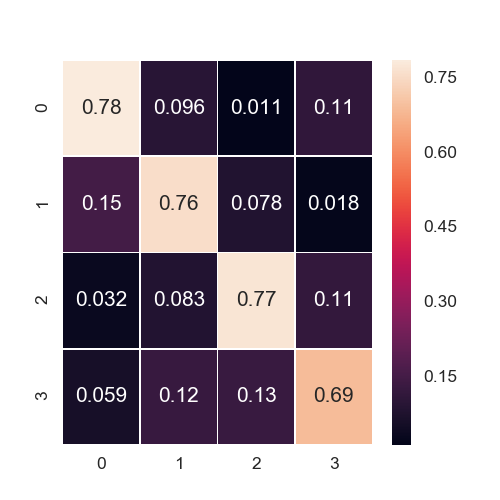

In [18]:
sns.set()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(Matrix, annot=True, linewidths=.5)

**Representing the evolution of the chain : **

<IPython.core.display.Javascript object>


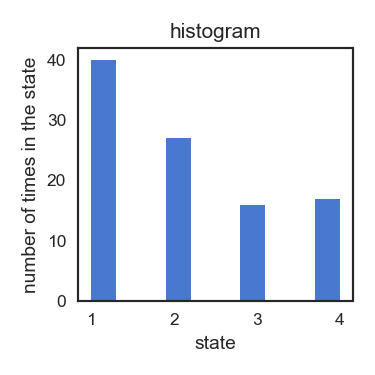

In [19]:
#Setting up seaborn : 
sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(1,1, figsize=(3,3))
#ploting the histogram  :
plt.hist(result)
plt.xlabel("state")
plt.ylabel("number of times in the state")
plt.title("histogram")

plt.tight_layout()

We can see in this histogram the states which were the most frequently visited

### 3. Exploring the potential of the `multiprocessing` package to implement a multithreaded version so that several Markov chains can be simulated in parallel : 

Using the documentation : https://docs.python.org/2/library/multiprocessing.html <br> and the medium article : https://medium.com/@grvsinghal/speed-up-your-python-code-using-multiprocessing-on-windows-and-jupyter-or-ipython-2714b49d6fac to solve errors, we save the function `Markov(N,rho,A,nmax)` in a file `markov_multithreads.py` that we import together with `Pool` from the `multiprocessing` package.

In [20]:
#Imports : 
from multiprocessing import Pool
import markov_multithreads

In [21]:
def Markov_Multithread(N,rho,A,nmax):
    if __name__ ==  '__main__':  #additional line to make it work on windows and Jupyter
        #Choosing the number of processors we want to use : 
        num_processors = 3
        #Creating a pool of processors :
        p=Pool(processes = num_processors)
        #Getting the processors to work in parallel
        #We use starmap to be able to to compute the function Markov which takes several arguments.
        output = p.starmap(markov_multithreads.Markov, [(N,rho,A,nmax) for i in range(0,3)])
        return output 

In [22]:
output=Markov_Multithread(4,Matrix[0],Matrix,100)
for i in range (0,3):
    print('process : \n', output[i],' \n')

process : 
 [2, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4]  

process : 
 [1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 3, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 1, 4, 1, 1, 1, 1, 2, 3, 4, 4, 3, 3, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]  

process : 
 [4, 2, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 4, 4, 3, 3, 3, 3, 3, 1, 1, 1, 1]  



We can now plot the histogram for each of the three results : 

<IPython.core.display.Javascript object>


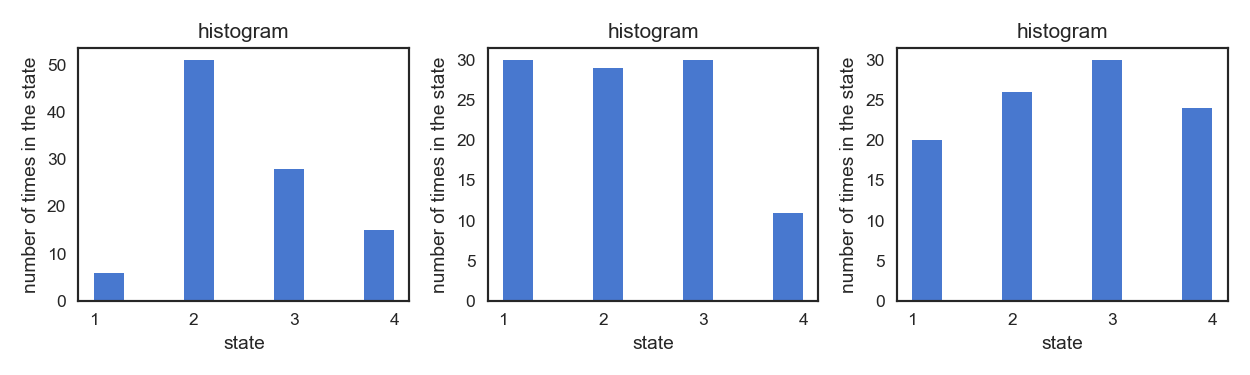

In [23]:
#Setting up seaborn : 
sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(1,3, figsize=(10,3))
#ploting the histogram  :

for i in range(0,3):
    plt.subplot(1,3,i+1)
    plt.hist(output[i])
    plt.xlabel("state")
    plt.ylabel("number of times in the state")
    plt.title("histogram")
    plt.tight_layout()

**This code permitted to compute several Markov chains in parralel**
<br>We see there are different results, so we can verify that the markov chain computed is different each time. 
<br>
<br>We can now compare the time taken for the multithreaded execution with the time taken for the execution of the `simple` version (without multiprocessing process).

Multithreaded version with 3 Markov chains computed in parallel :

In [24]:
%timeit -n 10 -r 10 Markov_Multithread(4,Matrix[0],Matrix,100)

The slowest run took 70.31 times longer than the fastest. This could mean that an intermediate result is being cached.
5.3 s ± 6.37 s per loop (mean ± std. dev. of 10 runs, 10 loops each)


"Simple" version : 

In [25]:
%timeit -n 10 -r 10 Markov(4,Matrix[0],Matrix,100)

The slowest run took 83.50 times longer than the fastest. This could mean that an intermediate result is being cached.
6.46 ms ± 16.8 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


We can clearly see that it is far slower to compute three Markov chains in parallel than to compute one markov chain directly.
<br> This is surely due to the slow processor this computation has been done on.